In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_colwidth", 400)

In [2]:
df_others = pd.read_excel("raw_cleaned_other_brands.xlsx")

In [3]:
df_others.head()

,Seller,Customer,Product name,Date,Rating,Review,Version,Oversea Shopping,Picture included
0,Cỏ Mềm Official Store,g*****g,Son kem nhung,2022-01-17 15:32:51,5,"Kết cấu:tint sệt\nĐộ bền màu:9/10\n\nshop CSKH cực kì tốt luôn, mình bị trục trặc xíu về đơn hàng nhưng shop rep và giải quyết nhanh chóng, màu son thì mình chấm 10/10, son có mùi vani ngọt nồng nên bạn nào hơi khó tính vấn đề mùi son thì nên cân nhắc\nhttps://cf.shopee.vn/file/22df0456671936758cac4f0ad13e8bfa\nhttps://cf.shopee.vn/file/4a41b0bf0a7cd201dc1775123d397e78",# LAYDOWN,no,yes
1,Cỏ Mềm Official Store,nhi62000,Son kem nhung,2022-01-22 02:45:42,5,"Kết cấu:mềm mướt, giữ ẩm cho môi không bị khô\nĐộ bền màu:khoảng 4h",#SEPIA,no,no
2,Cỏ Mềm Official Store,cutephomaiquene,Son kem nhung,2022-01-24 18:23:28,5,sang xịn mịn quá đỉnh lun ạ\nshop còn bán rẻ qá tr nữa chứ ạ hihi 😻😻😻😻\nhttps://cf.shopee.vn/file/7bb271ae3fb3f467f73d7e617733d97b,# LAYDOWN,no,yes
3,Cỏ Mềm Official Store,tiosmile,Son kem nhung,2022-01-25 12:04:45,5,"Video ko liên quan, son chính hãng, màu đẹp giá rẻ, ship siêu nhanh \nDncjdklamabdbdkdkalwmsndndmslwksncnfnfjfjfiflalwkndnx cncmfsmamsmd d dnxama\nhttps://cf.shopee.vn/file/0e3755303a9c7729cfe10025903495c6",# PLAY OFF,no,yes
4,Cỏ Mềm Official Store,tiosmile,Son kem nhung,2022-01-25 12:05:15,5,"Video ko liên quan, son chính hãng, màu đẹp giá rẻ, ship siêu nhanh \nDncjdklamabdbdkdkalwmsndndmslwksncnfnfjfjfiflalwkndnx cncmfsmamsmd d dnxama\nhttps://cf.shopee.vn/file/e626dd91841c8515a48112cd25c631bf",#SEPIA,no,yes


# Concatenate all Dataframes and add missing "Product name" column

In [4]:
excel_paths = ["raw_cleaned_pinkcoco.xlsx", "raw_cleaned_pinkflash.xlsx", "raw_cleaned_romand.xlsx","raw_cleaned_seimy.xlsx", "raw_cleaned_3ce.xlsx", 
            "raw_cleaned_bbia.xlsx","raw_cleaned_bebeau.xlsx","raw_cleaned_black_rouge.xlsx","raw_cleaned_cappuvini.xlsx","raw_cleaned_colorkey.xlsx",
            "raw_cleaned_diary.xlsx","raw_cleaned_foc.xlsx","raw_cleaned_gegebear.xlsx","raw_cleaned_herorange.xlsx","raw_cleaned_ineyoo.xlsx",
            "raw_cleaned_judydoll.xlsx","raw_cleaned_kimuse.xlsx","raw_cleaned_lemonade.xlsx","raw_cleaned_lilybyred.xlsx","raw_cleaned_merzy.xlsx",
            "raw_cleaned_minijumie.xlsx","raw_cleaned_ofelia.xlsx","raw_cleaned_periphera.xlsx"]

In [5]:
dfs = {}
for file_path in excel_paths:
    df = pd.read_excel(file_path)
    filename = file_path.split('.')[0]
    dfs[filename] = df

In [6]:
product_names = ["Pink Coco Son kem lì", "PINKFLASH Son môi dạng lỏng", "[Rom&nd] Son tint bóng", "Son kem Seimy - Princess Lipstick Matte",
                "Son môi 3CE Hazy Lip Clay", "Son Kem Lì Bbia", "Son Tint 3CE Bebeau Skin Shop", "Son Kem Black Rouge", "Son tint bóng CAPPUVINI",
                "Son kem lì Colorkey", "Son bóng Perfect Diary", "Son nhiều loại Focallure", "Son Bóng Lì Gegebear", "Son Kem Herorange", 
                "Son kem lì Ineyoo","Son tint dưỡng môi Judydoll", "Son môi Kimuse", "Son kem Lemonade", "Son Tint Bóng Lilybyred", "Son kem Merzy", 
                "Son môi Minijumie","Son nước OFÉLIA", "Son nhung - tint Periphera"]

In [7]:
df_list = []
for df_name in dfs:
    df_list.append(dfs[df_name])

In [8]:
for index, df in enumerate(df_list):
    product_name = product_names[index]
    df.insert(loc=2, column='Product name', value=product_name)

In [9]:
large_df = pd.concat(df_list, ignore_index=True)

In [10]:
final_df = pd.concat([large_df, df_others], ignore_index=True)

# Final rough preprocessing

In [11]:
final_df["Review"].dropna(inplace=True)
final_df.drop_duplicates(inplace=True)

#### Remove URLs of pictures included in data extraction

In [12]:
def clean_data(dataframe):
    dataframe['Review'] = dataframe['Review'].str.replace('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', regex=True)

clean_data(final_df)

In [13]:
final_df.drop_duplicates(subset=['Review'], inplace=True)

### Add missing customers' names

In [14]:
list_customer_na_index = final_df.loc[final_df['Customer'].notna() == False].index.values
for i in list_customer_na_index:
    final_df.at[i, 'Customer'] = f'Customer #{i}'

In [15]:
final_df

,Seller,Customer,Product name,Date,Rating,Review,Version,Oversea Shopping,Picture included
0,Sweet mint Official Store,hai_yen2208,Pink Coco Son kem lì,2023-04-09 17:06:07,5,"Sản phẩm okla nha mn, màu lên đúng hình trên ảnh chụp. Shipper thân thiện",5,no,no
1,Sweet mint Official Store,k*****5,Pink Coco Son kem lì,2023-04-17 05:44:39,1,Sản phẩm thì là vỏ ko\nKo có son bên trong\nKo hài lòng,4,no,no
2,Sweet mint Official Store,p*****7,Pink Coco Son kem lì,2023-04-20 09:32:24,5,"Làm đẹp:môi\n\nGiá rẻ mà chất lượng màu cũng siêu xinh, nên mua nha mng\n\n\n",4,no,yes
3,Sweet mint Official Store,kitanhnguyen,Pink Coco Son kem lì,2023-05-23 05:08:56,5,Hiệu ứng làm đẹp:rất là đẹp 😍\nKinh nghiệm sử dụng:ko thể miêu tả,4,no,no
4,Sweet mint Official Store,phuongthao.alin,Pink Coco Son kem lì,2023-05-23 11:08:28,5,Hiệu ứng làm đẹp:tốt\nKinh nghiệm sử dụng:ko có\nMẹo:ko\n\nSẽ mua lại,2,no,no
...,...,...,...,...,...,...,...,...,...
235014,ZEESEA Official Store,nguyenthicamtu1,Son kem lì ZEESEA,2024-01-10 14:47:52,3,Độ bền màu:Không lì nha .\nCông dụng:son\n\nMàu thì cũng gọi là ok đẹp . Nhưng về độ lì thì tệ lun nha .khi test thử ra tay mình cố gắng chờ cho nó khô xem lì nhìn nào thì kqua k như mong .bôi cái ra liền lun dù đã chờ 15p. Còn lên môi thig màu đẹp đấy chỉ phù hợp cho son lên khi ko ăn uống dì nha chứ ăn uống là 1 cái trôi sạch đó mấy bà.\n=> ổn với giá này,M04,no,no
235015,ZEESEA Official Store,thyminh564,Son kem lì ZEESEA,2024-01-10 14:58:58,5,Độ bền màu:lì thấy mẹ luôn má\nCông dụng:đấm mỏ\n\nOke nma mua sai màu nên da đen quá đánh dô đen thui\n,Nước đến sương mù: M03,no,yes
235017,ZEESEA Official Store,y*****i,Son kem lì ZEESEA,2024-01-10 15:52:46,5,Mình dùng qua r chất son tốt nên chị họ nhờ đặt dùm. Son xinh màu xịn🫶🏻,M04,no,no
235018,ZEESEA Official Store,h*****b,Son kem lì ZEESEA,2024-01-10 16:01:06,5,Đẹp nha nhức cái nách nha nên mua i lại rẻ rề i mà mua nha mua nha chốt,M01,no,no


In [16]:
final_df.shape

(219610, 9)

In [55]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219610 entries, 0 to 235019
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Seller            219610 non-null  object        
 1   Customer          219610 non-null  object        
 2   Product name      219610 non-null  object        
 3   Date              219610 non-null  datetime64[ns]
 4   Rating            219610 non-null  int64         
 5   Review            219609 non-null  object        
 6   Version           218861 non-null  object        
 7   Oversea Shopping  219610 non-null  object        
 8   Picture included  219610 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(7)
memory usage: 24.8+ MB


In [63]:
# final_df.to_excel("all_data.xlsx", index=False)

# Data Visualization

In [2]:
df = pd.read_excel("all_data.xlsx")

In [54]:
by_seller = df["Seller"].value_counts()

In [61]:
by_rating = df["Rating"].value_counts()

In [55]:
by_rating = pd.DataFrame(df["Rating"].value_counts()).reset_index()
x1 = by_rating["index"]
y1 = by_rating["Rating"]

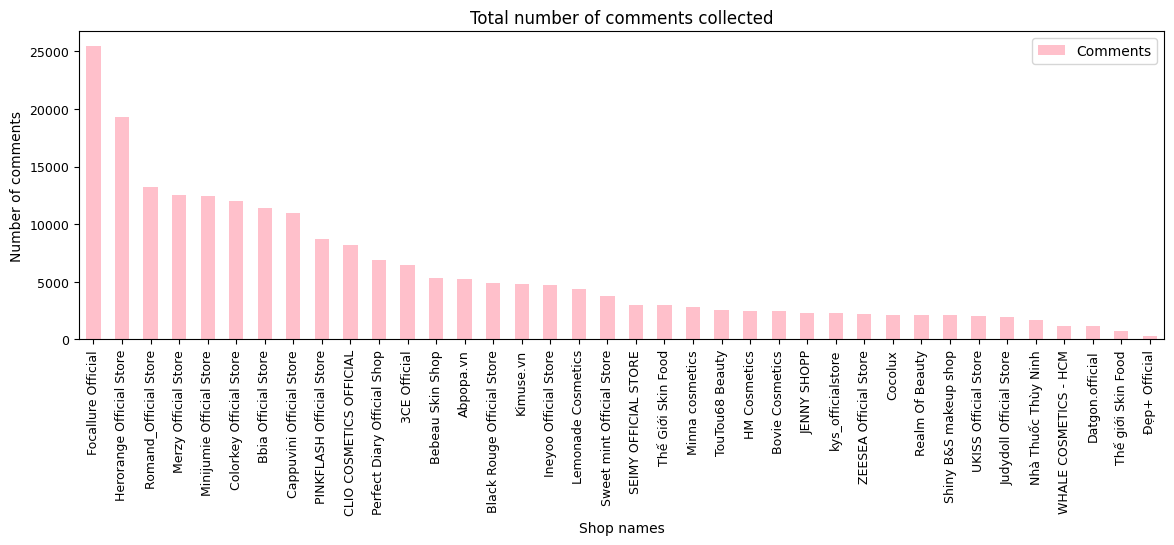

In [101]:
by_seller.plot(kind="bar", figsize=(14, 4), color="pink",
              xlabel="Shop names", ylabel="Number of comments", title="Total number of comments collected",
              fontsize=9)

plt.legend(["Comments"])
plt.show()

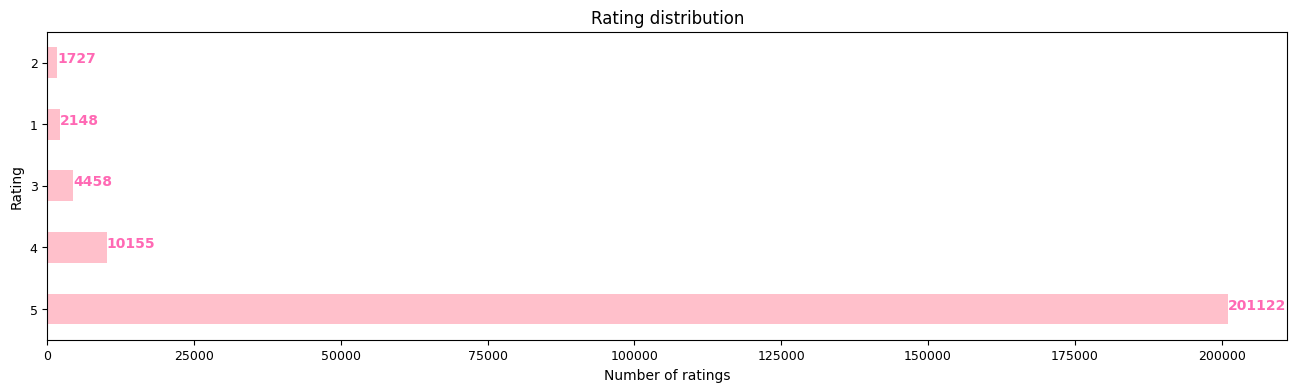

In [102]:
fig, ax = plt.subplots()
ax = by_rating.plot(kind="barh", figsize=(16, 4), color="pink",
              xlabel="Number of ratings", ylabel="Rating", title="Rating distribution",
              fontsize=9)    
for i, v in enumerate(by_rating):
    ax.text(v, i, str(v), 
            color = 'hotpink', fontweight = 'bold')

plt.show()